# Элементарные методы анализа временных рядов

In [1]:
import pandas as pd
import numpy as np

In [2]:
sales_of_company_x = pd.read_csv("Series/monthly-sales-of-company-x-jan-6.csv")
robberies_in_boston = pd.read_csv("Series/monthly-boston-armed-robberies-j.csv")
airlines_passengers = pd.read_csv("Series/international-airline-passengers.csv")
mean_monthly_temp = pd.read_csv("Series/mean-monthly-air-temperature-deg.csv")
dowjones_closing = pd.read_csv("Series/weekly-closings-of-the-dowjones-.csv")
female_births = pd.read_csv("Series/daily-total-female-births-in-cal.csv")

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
all_series = {
    "Monthly sales of company X": sales_of_company_x["Count"],
    "Monthly Boston armed robberies": robberies_in_boston["Count"],
    "International airline passengers: monthly totals in thousands": airlines_passengers["Count"],
    "Mean monthly air temperature (Deg. F) Nottingham Castle": mean_monthly_temp["Deg"],
    "Weekly closings of the Dow-Jones industrial average": dowjones_closing["Close"],
    "Daily total female births in California": female_births["Count"]
}

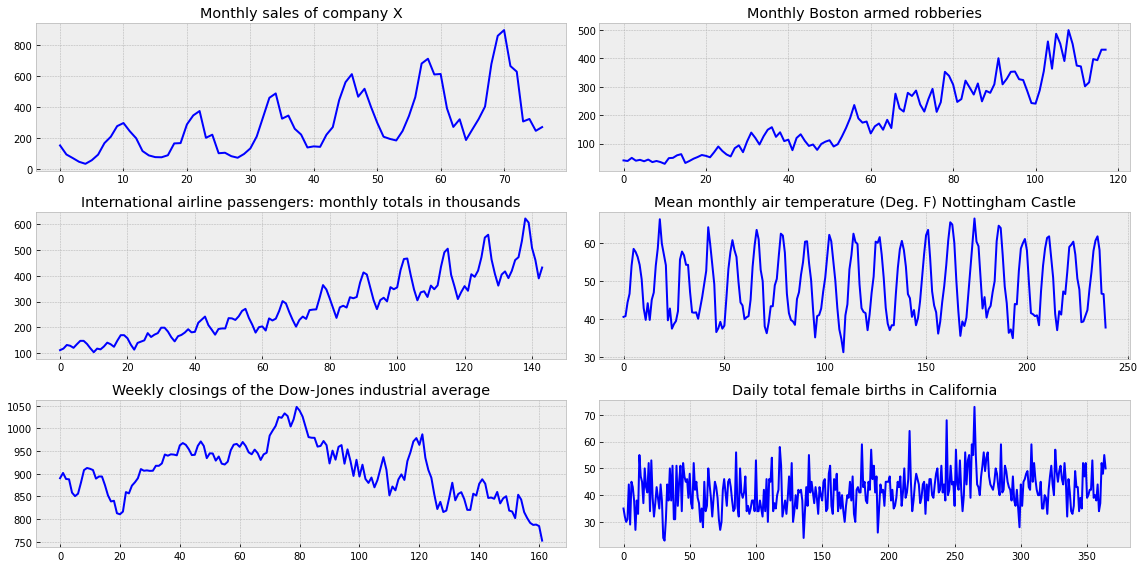

In [5]:
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    layout = (3, 2)
    for i, key in enumerate(all_series.keys()):
        x = i % 2
        y = int((i - x) / 2)
        
        ts_ax = plt.subplot2grid(layout, (y, x))
        all_series[key].plot(ax=ts_ax, color='blue')
        ts_ax.set_title(key)
        
    plt.tight_layout()

# Скользящее среднее

Начнем моделирование с наивного предположения - "завтра будет, как вчера", но вместо просто предсказания вида $\hat{y}_{t} = y_{t-1}$ будем считать, что будущее значение переменной зависит от среднего $n$ её предыдущих значений

$\hat{y}_{t} = \frac{1}{k} \displaystyle\sum^{k-1}_{n=0} y_{t-n}$

В данном случае $\hat{y}_{t}$ называется скользящей средней

In [6]:
def moving_average(series, n):
    if not isinstance(series, pd.Series):
        series = pd.Series(series)
    return series.rolling(n).mean() # скользящее окно размера n усредненное

In [7]:
ser = moving_average(sales_of_company_x["Count"], 7)

KeyError: (72, 76)

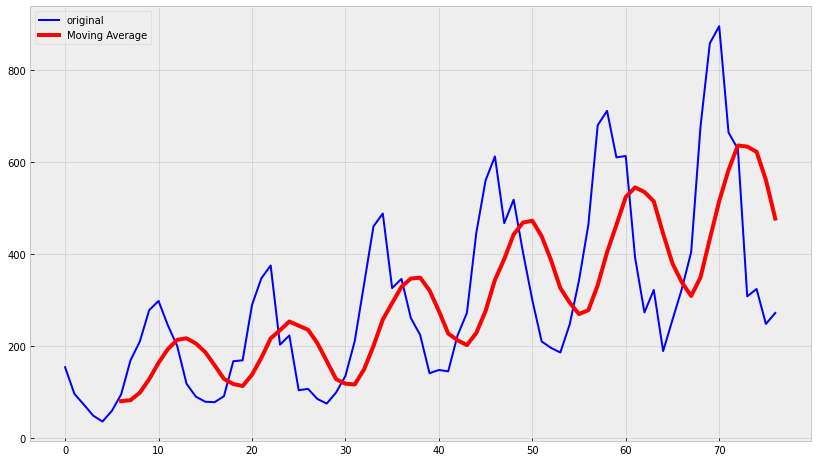

In [8]:
ser = moving_average(sales_of_company_x["Count"], 7)
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(sales_of_company_x["Count"], color='blue',label='original')
    plt.plot(ser, color='red', linewidth='4', label='Moving Average')
    plt.legend()

### Практика 1. В настоящем примере функция MA просто усредняет ряд. Напишите функцию, которая предсказывает 5 следующих измерений

In [29]:
def pred_five_next(series):
    last5 = []
    for i in range(0,5):
        last5.append(series.at[series.shape[0]-6+i])
    ser = moving_average(last5, 5)
    p1 = ser.at[4]
    last5.append(p1)
    for i in range(0,4):
        ser = moving_average(last5,5)
        p1 = ser.at[5+i]
        last5.append(p1)
    return last5[-6:-1]

In [33]:
new5 = pred_five_next(sales_of_company_x["Count"])

[664, 628, 308, 324, 248]


In [41]:
a = sales_of_company_x["Count"].append(new5,ignore_index=True)

TypeError: cannot concatenate object of type '<class 'numpy.int64'>'; only Series and DataFrame objs are valid

In [38]:
sales_of_company_x["Count"][-6:]

71    664
72    628
73    308
74    324
75    248
76    272
Name: Count, dtype: int64

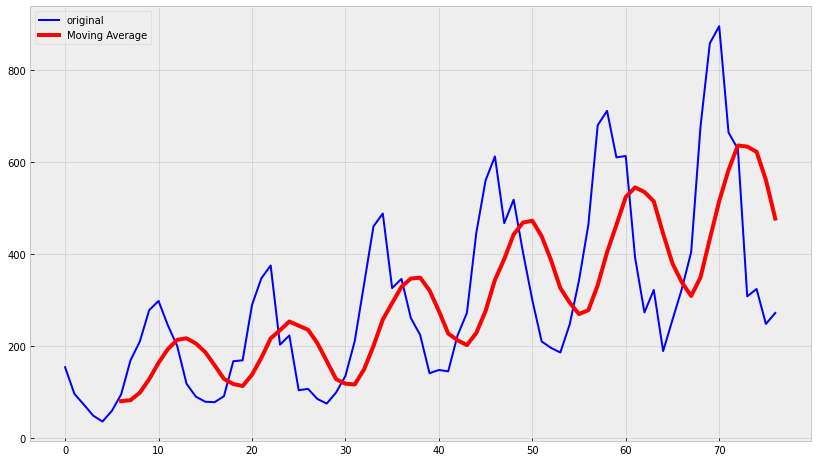

In [39]:
ser = moving_average(sales_of_company_x["Count"], 7)
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(sales_of_company_x["Count"], color='blue',label='original')
    plt.plot(ser, color='red', linewidth='4', label='Moving Average')
    plt.legend()

Чем больше размер "окна" скользящего среднего $n$ тем более сглаженным получается результат. По нескольким скользящим средним можно увидеть периоды резкого роста и резкого спада.

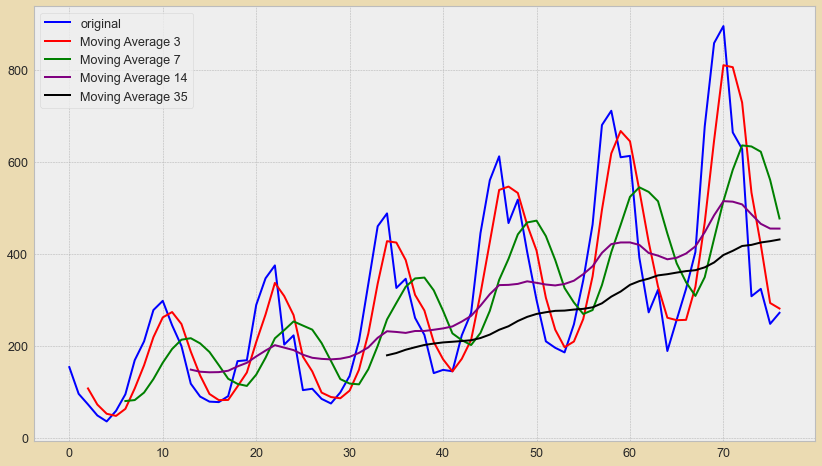

In [93]:
windows = [3,7,14,35]
colors = ['red', 'green', 'purple', 'black']
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(sales_of_company_x["Count"], color='blue',label='original')
    for i in range(len(windows)):
        ser = moving_average(sales_of_company_x["Count"], windows[i])
        plt.plot(ser, color=colors[i], linewidth='2', label='Moving Average {}'.format(windows[i]))
    plt.legend()

Характерная особенность обычного скользящего среднего - повышенная чувствительность к выбросам данных

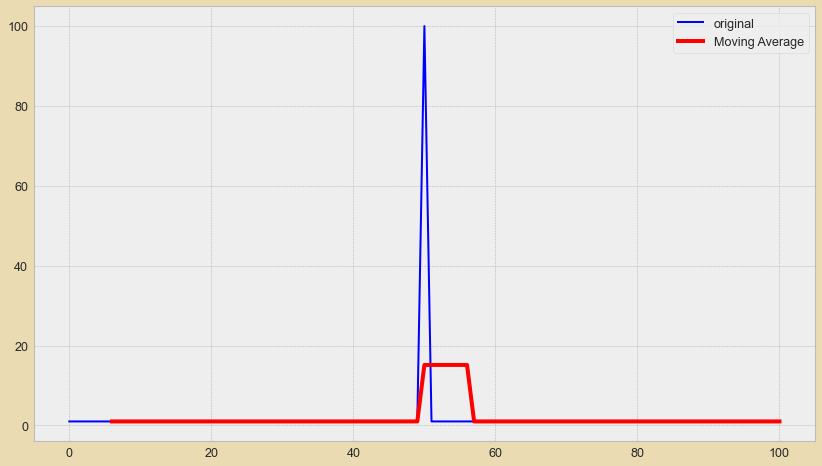

In [94]:
ts = pd.Series([1 for i in range(50)] + [100] + [1 for i in range(50)]) # 1 50 раз, потом 100, потом 50 раз еще 1
ser = moving_average(ts, 7)
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(ts, color='blue',label='original')
    plt.plot(ser, color='red', linewidth='4', label='Moving Average')
    plt.legend()

В случае сильно зашумленных данных скользящее среднее помогает определить тренд

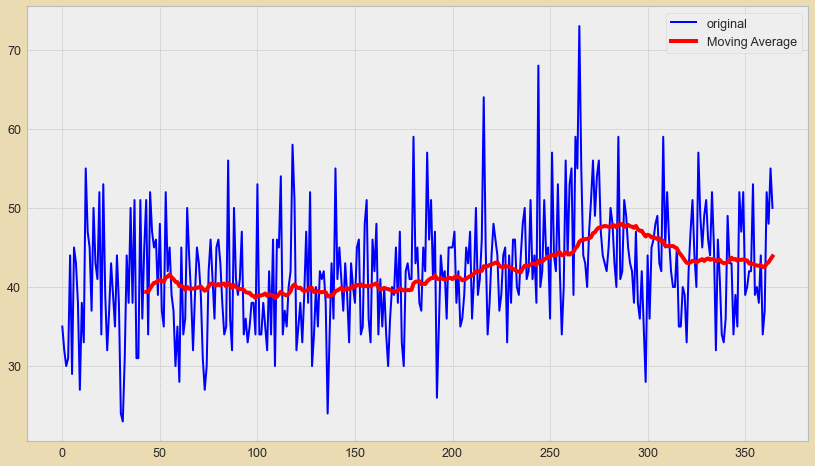

In [95]:
ts = female_births['Count']
ser = moving_average(ts, 44)
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(ts, color='blue',label='original')
    plt.plot(ser, color='red', linewidth='4', label='Moving Average')
    plt.legend()

### Практика 2. Сгенерируйте случайный шум и усредните его скользящим средним.

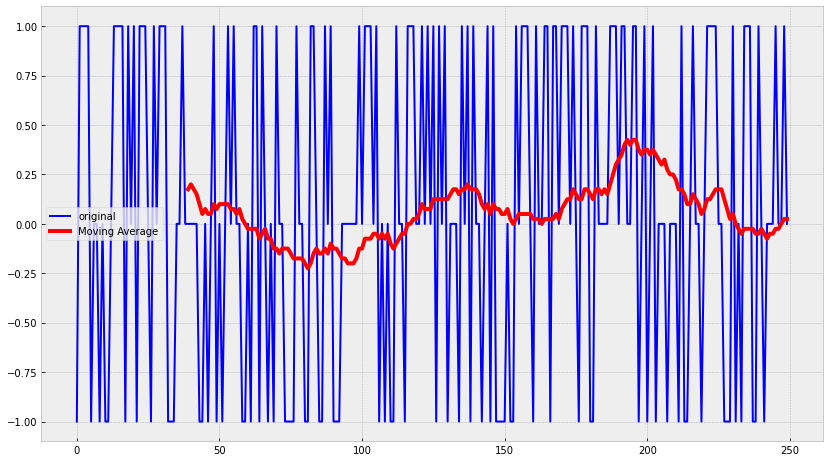

In [48]:
import random
random_values  =  pd.Series([random.randint(-1,1) for i in range(250)])
ser = moving_average(random_values,40)
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(random_values, color='blue',label='original')
    plt.plot(ser, color='red', linewidth='4', label='Moving Average')
    plt.legend()

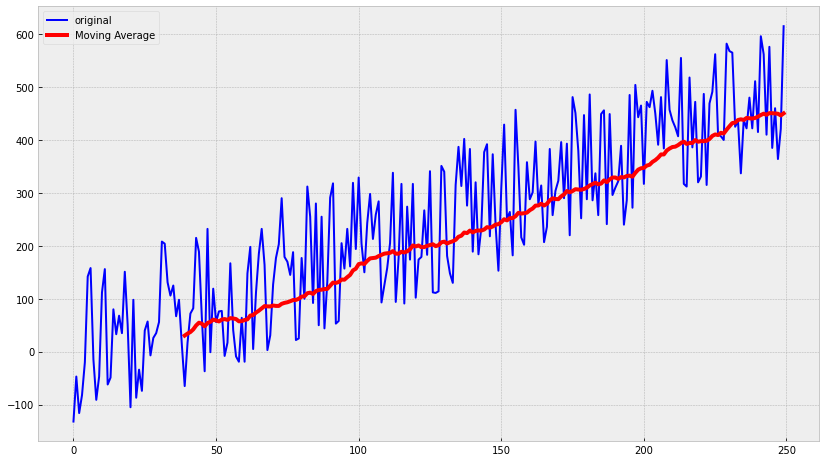

In [51]:
import random
random_values  =  pd.Series([random.randint(-150,150)+2*i for i in range(250)])
ser = moving_average(random_values,40)
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(random_values, color='blue',label='original')
    plt.plot(ser, color='red', linewidth='4', label='Moving Average')
    plt.legend()

### Практика 3. Сгенерируйте случайный шум с трендом и усредните его скользящим средним

Модификацией обычной скользящей средней является взвешенная скользящая средняя.

$\hat{y}_{t} = \displaystyle\sum^{k}_{n=1} \omega_n y_{t+1-n}$

$\displaystyle\sum^{k}_{n=1} {\omega_n} = 1$

Обычно чем ближе измерение к прогнозируемому - тем больше его вес

In [60]:
def weighted_moving_average(series, n, weights):
    if not isinstance(weights, np.ndarray): # проверка экземпляра классу
        weights = np.array(weights)
    if not isinstance(series, pd.Series):
        series = pd.Series(series)
    wma = series.rolling(n).apply(lambda s: (s * weights).sum() / weights.sum(), raw=True) # скользящее окно умножается скалярно на веса 
    return wma                                                                             # и делим на сумму весов (нормируем)

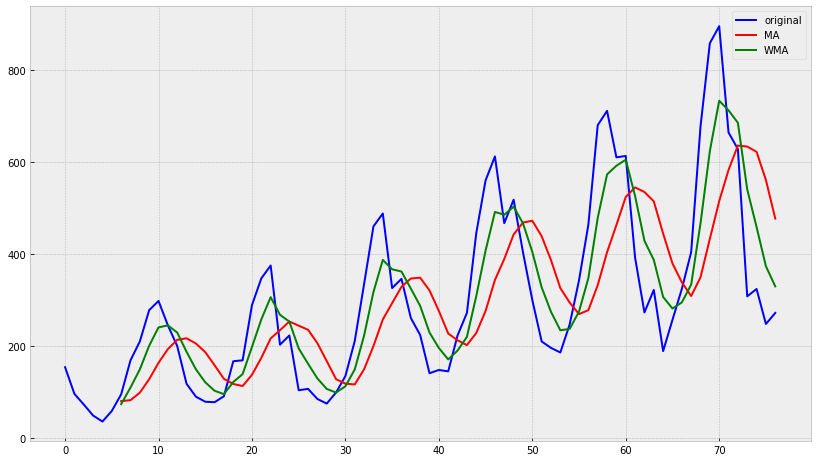

In [61]:
wma = weighted_moving_average(sales_of_company_x["Count"], 7, [1,1,2,3,5,8,13]) # Числа Фибоначчи в качестве весов
ma = moving_average(sales_of_company_x["Count"], 7)
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(sales_of_company_x["Count"], color='blue',label='original')
    plt.plot(ma, color='red', linewidth='2', label='MA')
    plt.plot(wma, color='green', linewidth='2', label='WMA')
    plt.legend()

Такая вариация moving average позволяет учитывать временной контекст. Чем раньше было событие - тем меньше оно влияет на прогнозируемое событие

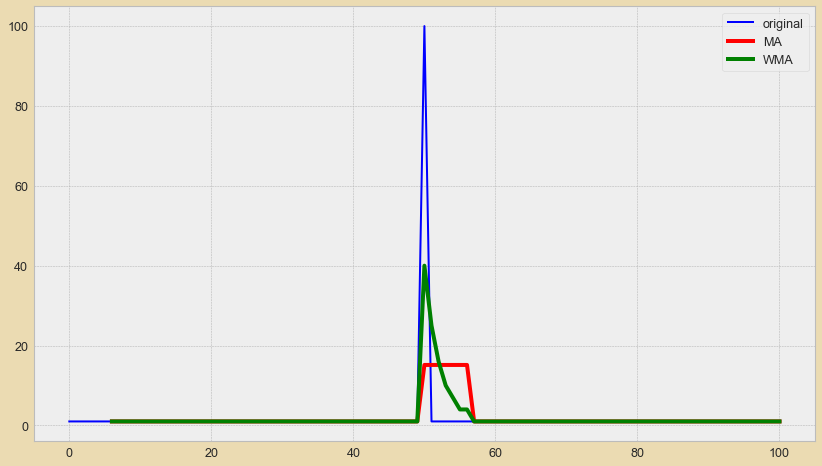

In [100]:
ts = pd.Series([1 for i in range(50)] + [100] + [1 for i in range(50)])
ma = moving_average(ts, 7)
wma = weighted_moving_average(ts, 7, [1,1,2,3,5,8,13])
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(ts, color='blue',label='original')
    plt.plot(ma, color='red', linewidth='4', label='MA')
    plt.plot(wma, color='green', linewidth='4', label='WMA')
    plt.legend()

### Практика 4. Возьмите ряд Monthly Boston armed robberies и примените к нему wma. В качестве коэффициентов рассмотрите числа Фиббоначи, последовательные числа и степени двойки. Оцените точность вашей модели с помощью  среднеквадратичной ошибки (RMSE)

In [57]:
def predict_wma(series, N, n_pred, weights):
    new_series = series.copy()
    for _ in range(n_pred):
        new_series = new_series.append(pd.Series([new_series[-N:]].append(lambda s: (s * weights).sum() / weights.sum(), raw=True), ignore_index = True)) # среденее по последним N значениям
    return new_series

In [58]:
predict_wma(robberies_in_boston['Count'], 5,5,[1,2,4,8,16])

TypeError: append() takes no keyword arguments

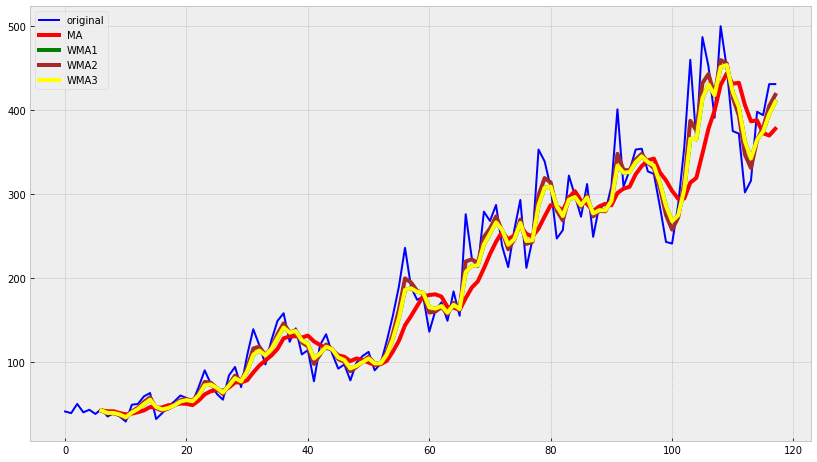

In [62]:
ts = robberies_in_boston['Count']
ma = moving_average(ts, 7)
wma1 = weighted_moving_average(ts, 7, [1,1,2,3,5,8,13])
wma2 =  weighted_moving_average(ts, 7, [1,2,4,8,16,32,64])
wma3 = weighted_moving_average(ts,7,[1,2,3,4,5,6,7])
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(ts, color='blue',label='original')
    plt.plot(ma, color='red', linewidth='4', label='MA')
    plt.plot(wma1, color='green', linewidth='4', label='WMA1')
    plt.plot(wma2, color='brown', linewidth='4', label='WMA2')
    plt.plot(wma1, color='yellow', linewidth='4', label='WMA3')

    plt.legend()

In [66]:
print(np.sqrt((ts[6:]-wma1[6:])**2).mean())
print(np.sqrt((ts[6:]-wma2[6:])**2).mean())
print(np.sqrt((ts[6:]-wma3[6:])**2).mean())

18.02840909090909
14.641240157480315
23.219706632653065


# Экспоненциальное сглаживание

Продолжаем развивать идею с историей. Мы хотим учитывать на самом деле учитывать не какой-то фиксированный набор измерений. В идеале - мы хотим учитывать всю историю измерений, накопившуюся к текущему моменту. Просто, как и в случае WMA, чем дальше измерение - тем меньше вклад. Для этого используется экспоненциальное скользящее среднее:

$$\hat{y}_{t} = \alpha \cdot y_t + (1-\alpha) \cdot \hat y_{t-1} $$

В нем предсказанное значение - это взвешеное срденее между последним наблюдением и предыдущей историей. Легко заметить, что формула рекурсивна. Параметр $\alpha$ называется сглаживающим фактором. Он определяет, как сильно мы будем опираться на историю (чем меньше - тем больше). Чем меньше $\alpha$, тем больше влияния оказывают предыдущие предсказанные значения, и тем сильнее сглаживается ряд. 

In [106]:
def exponential_moving_average(series, alpha):
    result = [series[0]]
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return pd.Series(result)

In [107]:
ema = exponential_moving_average(sales_of_company_x["Count"], 0.2)

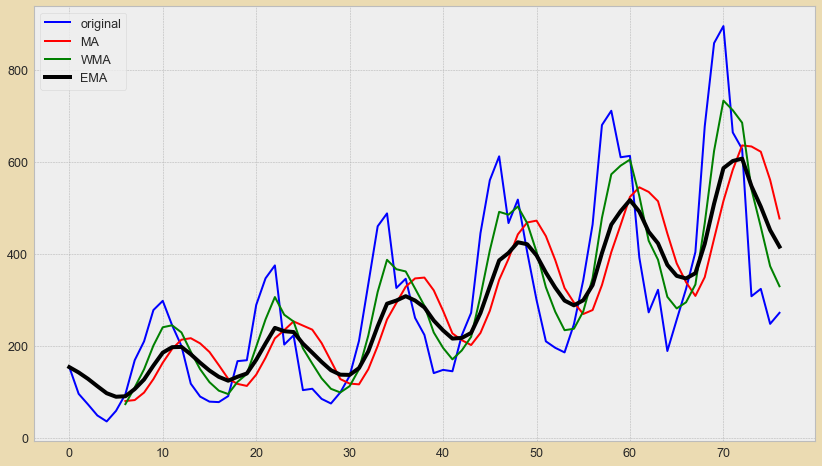

In [108]:
ema = exponential_moving_average(sales_of_company_x["Count"], 0.2)
wma = weighted_moving_average(sales_of_company_x["Count"], 7, [1,1,2,3,5,8,13])
ma = moving_average(sales_of_company_x["Count"], 7)
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(sales_of_company_x["Count"], color='blue',label='original')
    plt.plot(ma, color='red', linewidth='2', label='MA')
    plt.plot(wma, color='green', linewidth='2', label='WMA')
    plt.plot(ema, color='black', linewidth='4', label='EMA')
    plt.legend()

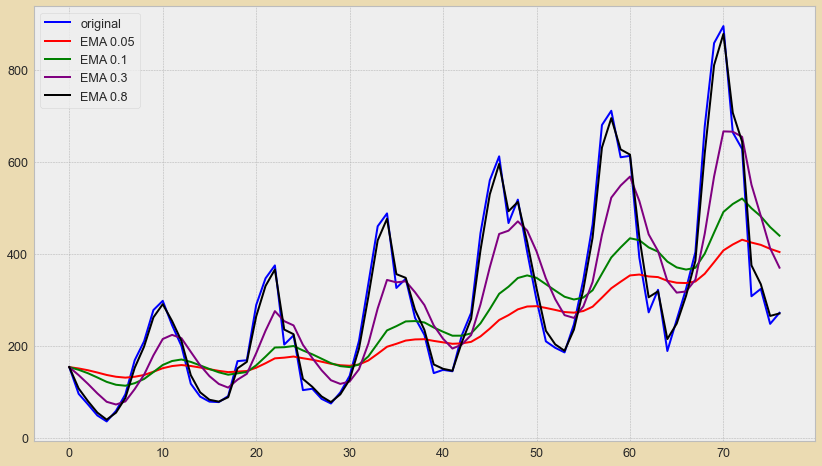

In [109]:
alphas = [0.05,0.1,0.3,0.8]
colors = ['red', 'green', 'purple', 'black']
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(sales_of_company_x["Count"], color='blue',label='original')
    for i in range(len(alphas)):
        ser = exponential_moving_average(sales_of_company_x["Count"], alphas[i])
        plt.plot(ser, color=colors[i], linewidth='2', label='EMA {}'.format(alphas[i]))
    plt.legend()

### Практика 5. Напишите функцию, которая предсказывает 5 наблюдений ряда на основе ema. Возьмите ряд Sales_of_company_x и спрогнозируйте

In [83]:
def exponential_moving_average_PRED(series, alpha,n_preds):
    result = [series[0]]
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    preds = [0]*n_preds
    preds[0] = result[-1] * alpha + (1-alpha) * series.to_list()[-1]
    preds[1] = result[-1] * (1-alpha) + alpha*preds[0] 
    for i in range(2,n_preds):
        preds[i] = preds[i-1]*alpha + preds[i-2]*(1-alpha)
    
    return pd.Series(preds)

In [84]:
exponential_moving_average_PRED(sales_of_company_x['Count'][:-5],0.7,5)

0    705.035715
1    710.311736
2    708.728930
3    709.203772
4    709.061319
dtype: float64

# Двойное экспоненциальное сглаживание

До сих пор мы рассматривали ряд - как единую составляющую. Но на самом деле, ряд $y_t$ можно представить в виде суммы $l_t$ (уровня) и $s_t$ (тренда). По сути - тренд - это основное направление движения ряда, а уровень - колебание вокруг этого тренда.

Для предсказания уровня мы используем подход на основе классического EMA:

$l_t = \alpha y_t + (1-\alpha)(l_{t-1} + s_{t-1})$

Для прогноза тренда используем так же EMA и простое соображение: историческое значение тренда - это историческое значение тренда, а текущее значение тренда - это изменение уровня. Получим такую формулу:

$s_t = \beta (l_t - l_{t-1}) + (1 - \beta) s_{t-1}$

Итоговый ряд предсказываем по следующей формуле

$\hat{y}_{t+1} = l_t + s_t$

In [123]:
def double_ema(series, alpha, beta):
    result = [series[0]]
    level, trend = series[0], series[1] - series[0] # начальные значения левела и тренда
    for n in range(1, len(series)):
        value = series[n]
        last_level, level = level, alpha*value + (1-alpha)*(level+trend)
        trend = beta*(level-last_level) + (1-beta)*trend
        result.append(level+trend)
    return pd.Series(result)

In [113]:
def plot_dema(alpha, beta):
    dema = double_ema(sales_of_company_x["Count"], alpha, beta)
    with plt.style.context('bmh'):
        plt.figure(figsize=(14, 8))
        plt.plot(sales_of_company_x["Count"], color='blue',label='original')
        plt.plot(dema, color='red', linewidth='4', label='DEMA')
        plt.title("alpha={}, beta={}".format(alpha, beta))
        plt.legend()

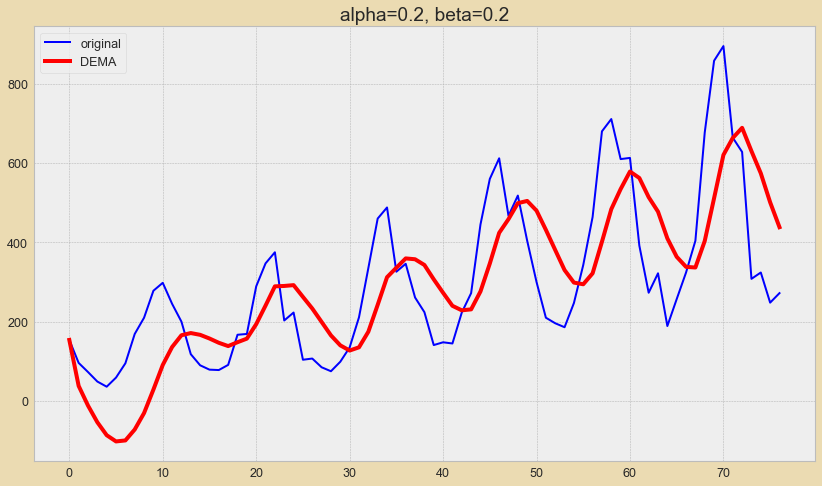

In [114]:
plot_dema(0.2, 0.2)

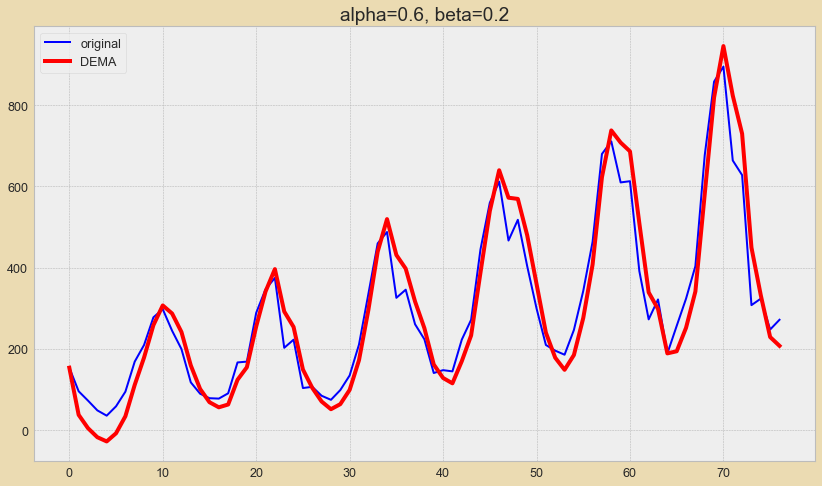

In [115]:
plot_dema(0.6, 0.2)

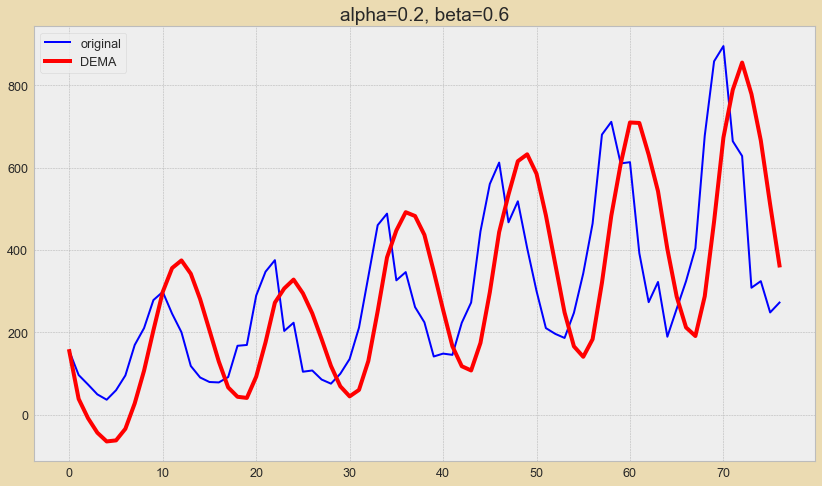

In [116]:
plot_dema(0.2, 0.6)

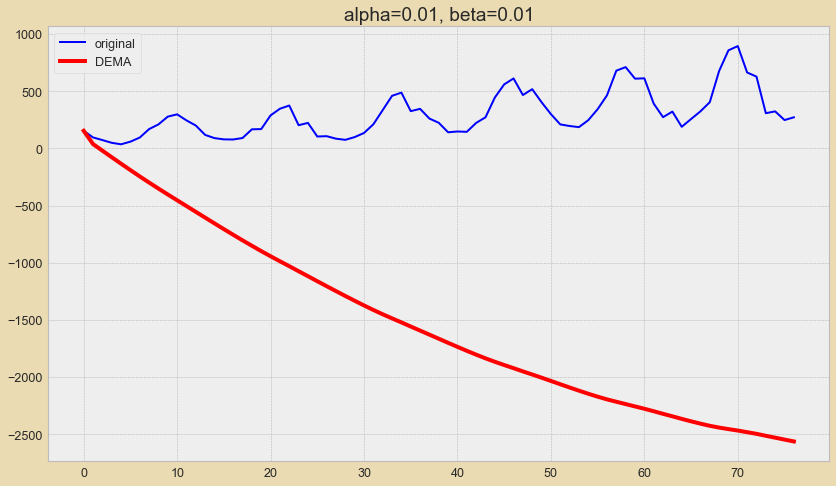

In [117]:
plot_dema(0.01, 0.01)

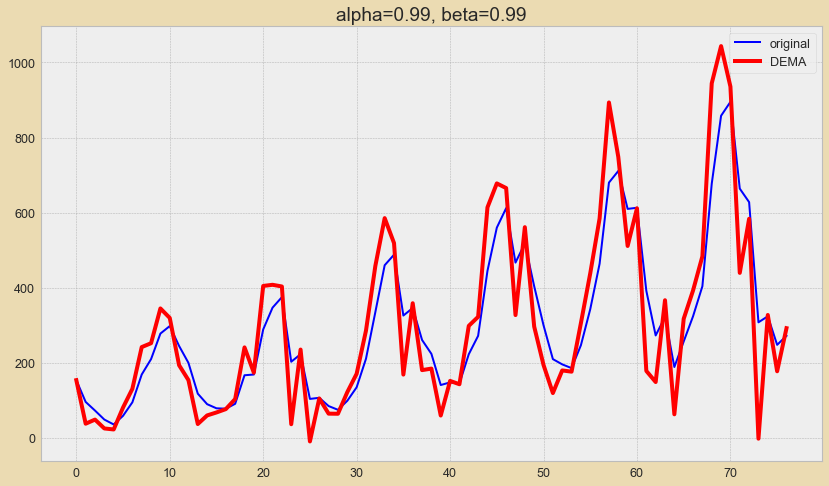

In [118]:
plot_dema(0.99, 0.99)

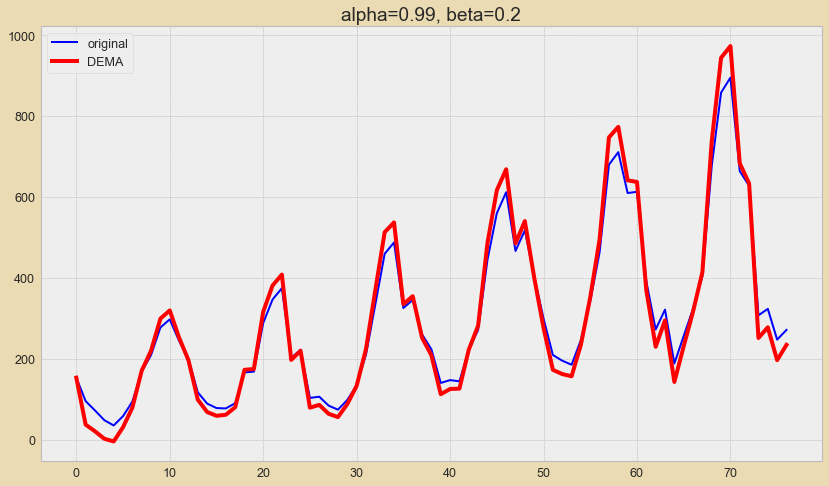

In [119]:
plot_dema(0.99, 0.2)

Как мы видим, настройка параметров $\alpha$ и $\beta$ может порой давать самые причудливые результаты. $\alpha$ отвечает за сглаживание ряда вокруг тренда, $\beta$ - за сглаживание самого тренда. Чем больше значения, тем более значимыми будут последние наблюдения и менее значимой будет история.

### Практика 6. Напишите функцию, которая предсказывает 5 наблюдений ряда на основе double_ema. Возьмите ряд Sales_of_company_x и спрогнозируйте

In [85]:
def double_ema_pred(series, alpha, beta,n_preds):
    result = [series[0]]
    level, trend = series[0], series[1] - series[0] # начальные значения левела и тренда
    for n in range(1, len(series)):
        value = series[n]
        last_level, level = level, alpha*value + (1-alpha)*(level+trend)
        trend = beta*(level-last_level) + (1-beta)*trend
        result.append(level+trend)
    preds = [0]*n_preds
    preds[0] = result[-1]
    for i in range(1,n_preds):
        value = preds[i-1]
        last_level, level = level, alpha*value + (1-alpha)*(level+trend)
        trend = beta*(level-last_level) + (1-beta)*trend
        preds[i] = level+trend
    return pd.Series(preds)

In [90]:
double_ema_pred(sales_of_company_x['Count'],0.2, 0.2, 5)

0    438.226261
1    421.215586
2    404.204912
3    387.194237
4    370.183563
dtype: float64

# Хольт-Винтерс

Суть метода в том, что начинаем еще учитывать сезонность. Она учитывается в виде третьей компоненты.

**Важно** - метод применим только в случае сезонности. Если ее нет - метод хольта-винтерса не даст хороших результатов;

$l_t = \alpha(y_t - p_{t-\tau}) + (1-\alpha)(l_{t-1} + s_{t-1})$


$s_t = \beta(l_t - l_{t-1}) + (1-\beta)s_{t-1}$

$p_t = \gamma(y_t - l_t) + (1-\gamma)p_{t-\tau}$

$\hat{y}_{t+m} = l_x + ms_t + p_{t-\tau+1+(m-1)mod\tau}$

Сезонная компонента $p_t$ объясняет повторяющиеся колебания вокруг уровня и тренда; ее параметр - период, после которого начинаются повторения колебаний. Для каждого наблюдения в сезоне формируется своя компонента, например, если длина сезона составляет 3, то мы получим 3 сезонные компоненты.

В уровене из значения ряда теперь вычитается сезонная компонента;

Тренд остаётся без изменений;

Сезонная компонента зависит от текущего значения ряда за вычетом уровня и от предыдущего значения компоненты.

**При сглаживании сезонной компоненты - она сглаживается только со своими измерениями**

In [96]:
def initial_trend(series, season_len):
    return sum([float(series[i + season_len] - series[i]) / season_len]) / season_len

In [97]:
# функция инициализации начального момента времени
def initial_seasonal_components(series, slen):
    seasonals = {}
    season_averages = []
    n_seasons = int(len(series)/slen)
    # compute season averages
    for j in range(n_seasons):
        season_averages.append(sum(series[slen*j:slen*j+slen])/float(slen))
    # compute initial values
    for i in range(slen):
        sum_of_vals_over_avg = 0.0
        for j in range(n_seasons):
            sum_of_vals_over_avg += series[slen*j+i]-season_averages[j]
        seasonals[i] = sum_of_vals_over_avg/n_seasons
    return seasonals

In [98]:
def triple_exponential_smoothing(series, slen, alpha, beta, gamma, n_preds):
    result = []
    seasonals = initial_seasonal_components(series, slen)
    for i in range(len(series)+n_preds):
        if i == 0: # initial values
            smooth = series[0]
            trend = initial_trend(series, slen)
            result.append(series[0])
            continue
        if i >= len(series): # we are forecasting
            m = i - len(series) + 1
            result.append((smooth + m*trend) + seasonals[i%slen])
        else:
            val = series[i]
            last_smooth, smooth = smooth, alpha*(val-seasonals[i%slen]) + (1-alpha)*(smooth+trend)
            trend = beta * (smooth-last_smooth) + (1-beta)*trend
            seasonals[i%slen] = gamma*(val-smooth) + (1-gamma)*seasonals[i%slen]
            result.append(smooth+trend+seasonals[i%slen])
    return result

In [99]:
def plot_tema(alpha, beta, gamma, ser=sales_of_company_x["Count"], ser_to_plot=sales_of_company_x["Count"], n_preds=24):
    tema = triple_exponential_smoothing(ser, 12, alpha, beta, gamma, n_preds)
    with plt.style.context('bmh'):
        plt.figure(figsize=(14, 8))
        plt.plot(ser_to_plot, color='blue',label='original')
        plt.plot(tema, color='red', linewidth='4', label='TEMA')
        plt.title("alpha={}, beta={}, gamma={}".format(alpha, beta, gamma))
        plt.legend()

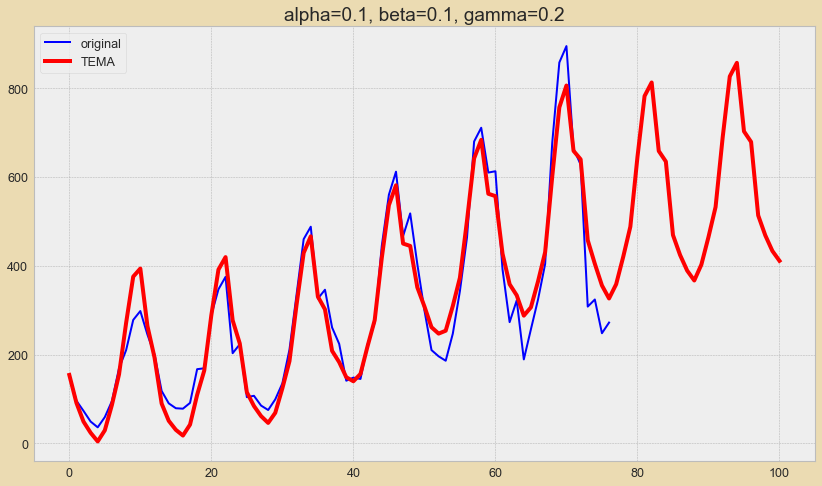

In [136]:
plot_tema(0.1, 0.1, 0.2)

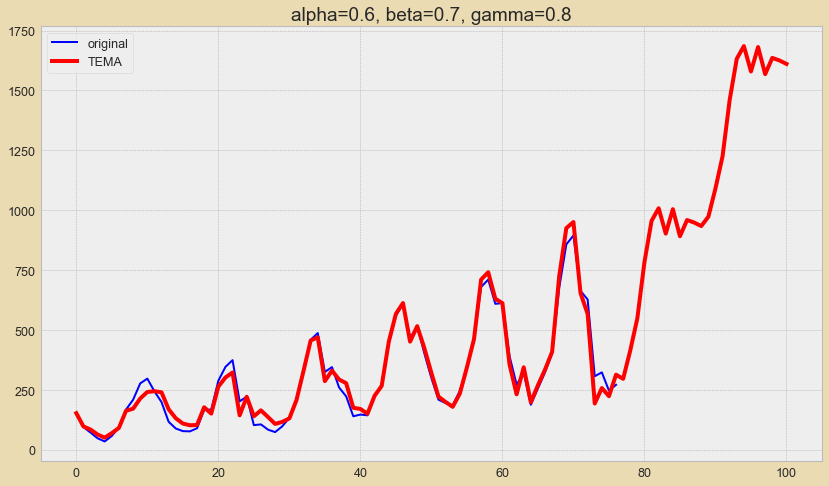

In [137]:
plot_tema(0.6, 0.7, 0.8)

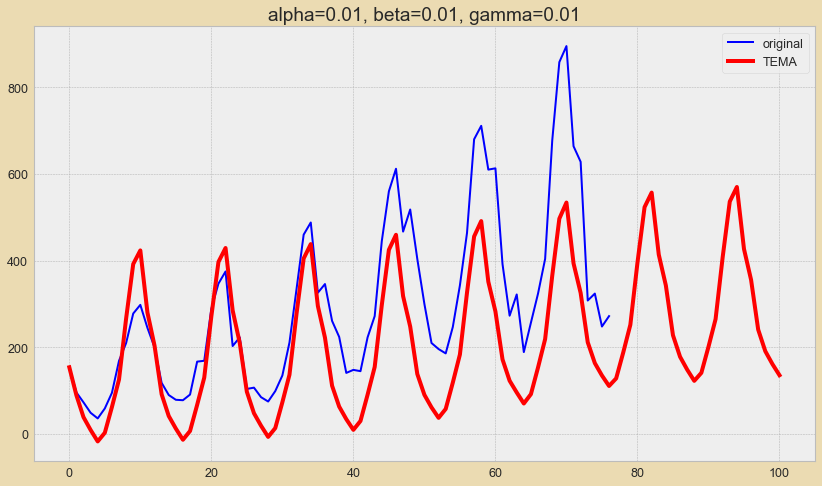

In [138]:
plot_tema(0.01, 0.01, 0.01)

# Подбор параметров

Что значит, что наша модель лучше всего приближает исходные данные? Это значит, что минимизируется некоторая функция ошибки. Мы, для простоты, будет считать стандарнтый RMSE:

$RMSE =  \sqrt {1/n \sum^N_{i=1} (\hat{y}_i - y_i)^2}$

Алгоритм поиска стандартный - метод градиентного спуска. Считаем производный по каждому из параметров и спускаемся в сторону минимума.

In [94]:
from scipy.optimize import minimize
from sklearn.metrics import mean_squared_error

In [140]:
series = sales_of_company_x["Count"]

In [141]:
# разбиваем на train, test, val
train, test, val = series[:60], series[60:70], series[70:]

In [142]:
def mse(X): # функция ошибки MSE
    alpha, beta, gamma = X
    result = triple_exponential_smoothing(train, 12, alpha, beta, gamma, len(test)) # 12 - это сезонность
    predictions = result[-len(test):]
    error = mean_squared_error(predictions, test)
    return error

In [143]:
opt = minimize(mse, x0=[0,0,0], method="L-BFGS-B", bounds = ((0, 1), (0, 1), (0, 1)))

In [144]:
alpha_opt, beta_opt, gamma_opt = opt.x
print(opt)

      fun: 4491.493078146865
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([1944.68639165, 1443.26641021, 1556.93178385])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 176
      nit: 18
   status: 0
  success: True
        x: array([0.12173468, 0.32840544, 0.792565  ])


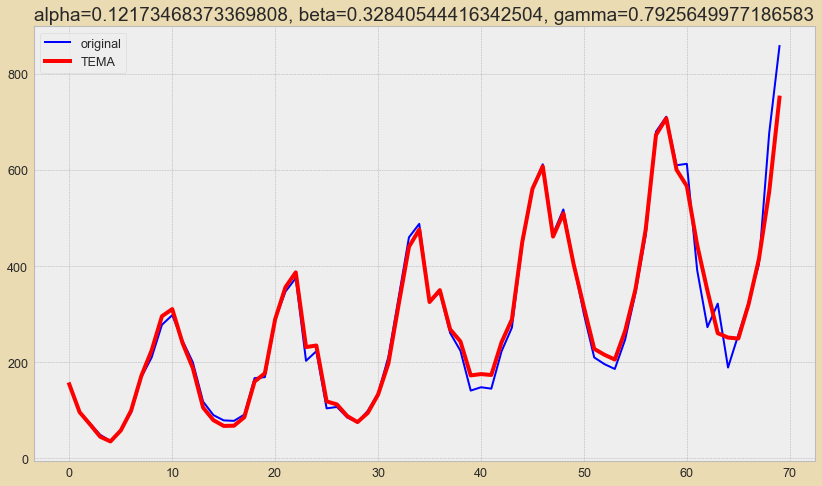

In [145]:
plot_tema(alpha_opt, beta_opt, gamma_opt, ser=train, ser_to_plot=series[:70], n_preds=len(test))

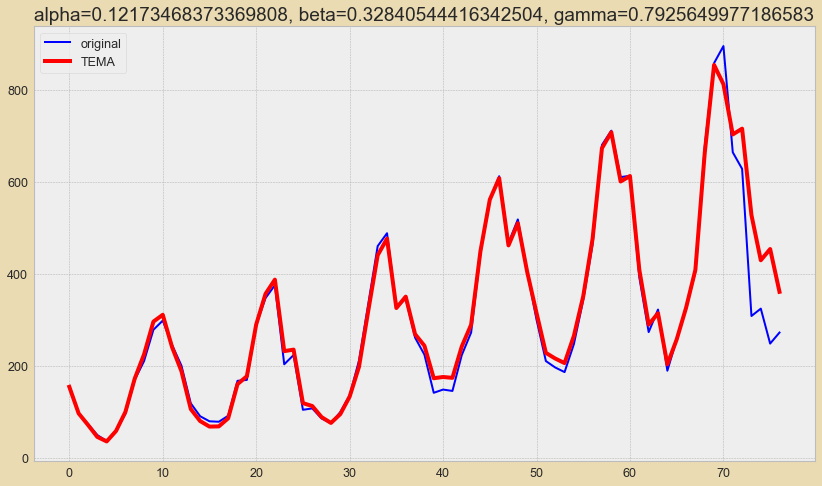

In [146]:
plot_tema(alpha_opt, beta_opt, gamma_opt, ser=series[:70], ser_to_plot=series, n_preds=len(val))

# Кросс-валидация

Проблема кросс-валидации на временных рядах состоит в том, что случайно перемешивать в фолдах значения всего ряда нельзя. Т.к. он имеет временную структуру, и ее надо сохранять (иначе потеряются все взаимосвязи наблюдений);

Будем делать кросс-валидацию на скользящем окне.

Суть достаточно проста:
1. Берем t измерений
2. Делаем прогноз на n измерений вперед и считаем ошибку
3. Берем t+n измерений
4. Делаем прогноз на n измерений вперед и считаем ошибку
5. Берем t+2*n измерений
6. Делаем прогноз на n измерений вперед и считаем ошибку
...

In [147]:
train, val = series[:65], series[65:]

In [108]:
from sklearn.model_selection import TimeSeriesSplit

def mse_cross_val(X):
    alpha, beta, gamma = X
    split = TimeSeriesSplit(n_splits=7) 
    errors = []
    
    for train_split, test_split in split.split(train):
        result = triple_exponential_smoothing(train_split, 12, alpha, beta, gamma, len(test_split))
        predictions = result[-len(test_split):]
        error = mean_squared_error(predictions, test_split)
        errors.append(error)

    return np.mean(np.array(errors))

In [109]:
opt = minimize(mse_cross_val, x0=[0,0,0], method="L-BFGS-B", bounds = ((0, 1), (0, 1), (0, 1)))

In [110]:
alpha_opt, beta_opt, gamma_opt = opt.x
print(opt)

      fun: 0.021151468056823625
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([1.20042865e-06, 4.85722574e-07, 2.70616861e-08])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 176
      nit: 37
     njev: 44
   status: 0
  success: True
        x: array([0.07153563, 0.21631513, 0.93742457])


In [111]:
plot_tema(alpha_opt, beta_opt, gamma_opt, ser=train, ser_to_plot=series, n_preds=len(val))

NameError: name 'series' is not defined

In [126]:
train, val = airlines_passengers['Count'][:125], airlines_passengers['Count'][125:]

In [130]:
from sklearn.model_selection import TimeSeriesSplit

def mse_cross_val(X):
    alpha, beta, gamma = X
    split = TimeSeriesSplit(n_splits=3) 
    errors = []
    
    for train_split, test_split in split.split(train):
        result = triple_exponential_smoothing(train_split, 12, alpha, beta, gamma, len(test_split))
        predictions = result[-len(test_split):]
        error = mean_squared_error(predictions, test_split)
        errors.append(error)

    return np.mean(np.array(errors))
opt = minimize(mse_cross_val, x0=[0,0,0], method="L-BFGS-B", bounds = ((0, 1), (0, 1), (0, 1)))
alpha_opt, beta_opt, gamma_opt = opt.x
print(opt)

      fun: 5.216112196208639e-06
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.00087033, -0.00027222,  0.00019273])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 464
      nit: 90
     njev: 116
   status: 0
  success: True
        x: array([0.03572444, 0.28782134, 0.98720334])


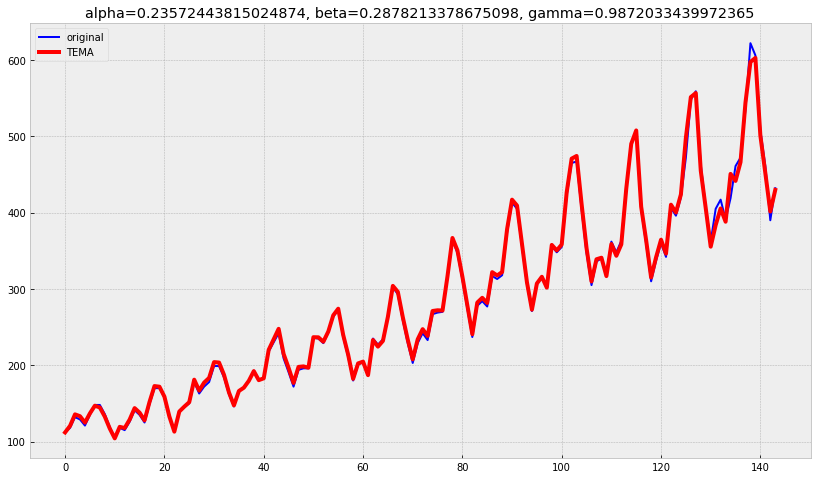

In [131]:
plot_tema(alpha_opt+0.2, beta_opt, gamma_opt, ser=train, ser_to_plot=airlines_passengers['Count'], n_preds=len(val))

In [134]:
result = triple_exponential_smoothing(train, 12, opt.x[0]+0.2, opt.x[1], opt.x[2], len(val))
predictions = result[-len(val):]

In [136]:
np.sqrt((predictions -  airlines_passengers['Count'][125:])**2).mean()

10.92201947561876

### Практика 7. Напишите функцию, которая подбирает оптимальные параметры для double_ema и ряда Sales_of_company_x

In [141]:
train, val = airlines_passengers['Count'][:125], airlines_passengers['Count'][125:]

In [152]:
from sklearn.model_selection import TimeSeriesSplit

def mse_cross_val_d_ema(X):
    alpha, beta =  X
    split = TimeSeriesSplit(n_splits=3) 
    errors = []
    
    for train_split, test_split in split.split(train):
        result = double_ema_pred(train_split,alpha,beta,len(test_split))
        predictions = result[-len(test_split):]
        print(predictions)
        error = mean_squared_error(predictions, test_split)
        errors.append(error)
    return np.mean(np.array(errors))



In [153]:
opt = minimize(mse_cross_val_d_ema, x0=[0.0,0.0], method="L-BFGS-B", bounds = ((0, 1), (0, 1)))
alpha_opt, beta_opt = opt.x
print(opt)

0     32.0
1     33.0
2     34.0
3     35.0
4     36.0
5     37.0
6     38.0
7     39.0
8     40.0
9     41.0
10    42.0
11    43.0
12    44.0
13    45.0
14    46.0
15    47.0
16    48.0
17    49.0
18    50.0
19    51.0
20    52.0
21    53.0
22    54.0
23    55.0
24    56.0
25    57.0
26    58.0
27    59.0
28    60.0
29    61.0
30    62.0
dtype: float64
0     63.0
1     64.0
2     65.0
3     66.0
4     67.0
5     68.0
6     69.0
7     70.0
8     71.0
9     72.0
10    73.0
11    74.0
12    75.0
13    76.0
14    77.0
15    78.0
16    79.0
17    80.0
18    81.0
19    82.0
20    83.0
21    84.0
22    85.0
23    86.0
24    87.0
25    88.0
26    89.0
27    90.0
28    91.0
29    92.0
30    93.0
dtype: float64
0      94.0
1      95.0
2      96.0
3      97.0
4      98.0
5      99.0
6     100.0
7     101.0
8     102.0
9     103.0
10    104.0
11    105.0
12    106.0
13    107.0
14    108.0
15    109.0
16    110.0
17    111.0
18    112.0
19    113.0
20    114.0
21    115.0
22    116.0
23    117.0


# Дополнительно почитать

[Triple Exponential Smoothing](https://www.itl.nist.gov/div898/handbook/pmc/section4/pmc435.htm)

[Holt-Winters Forecasting for Dummies (or Developers)](https://grisha.org/blog/2016/01/29/triple-exponential-smoothing-forecasting/)